In [28]:
from abc import ABC, abstractmethod
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

### Generating dataset

In [3]:
def generate_data(n=100):
    result = random.choices([0, 1], weights=[0.1, 0.9], k=n)
    result = np.array(result, dtype=float)
    result[result == 0] = np.random.normal(10, 1, len(result[result == 0]))
    result[result == 1] = np.random.normal(5, 1, len(result[result == 1]))
    return result

### Implementation

In [56]:
class kde:
    __slots__ = ["kernel_type", "bandwidth", "data", "n"]

    def __init__(self, kernel_type="gaussian", bandwidth=1):
        self.kernel_type = kernel_type
        self.bandwidth = bandwidth

    def fit(self, data):
        self.data = data
        self.n = len(data)

    @abstractmethod
    def gaussian_kernel(self, x, mean, std):
        return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

    @abstractmethod
    def top_hat_kernel(self, x, mean, std):
        return (np.abs(x - mean) <= std) / (2 * std)

    @abstractmethod
    def epanechnikov_kernel(self, x, mean, std):
        return 3 / 4 * (1 - ((x - mean) / std) ** 2) * (np.abs(x - mean) <= std) / std

    @abstractmethod
    def exponential_kernel(self, x, mean, std):
        return np.exp(-np.abs(x - mean) / std) / (2 * std)

    def transform(self, x):
        if not isinstance(x, np.ndarray):
            x = np.array([x])
        solution = np.zeros(len(x))
        for data_point in self.data:
            if self.kernel_type == "gaussian":
                solution += self.gaussian_kernel(x, mean=data_point, std=self.bandwidth)
            elif self.kernel_type == "top_hat":
                solution += self.top_hat_kernel(x, mean=data_point, std=self.bandwidth)
            elif self.kernel_type == "epanechnikov":
                solution += self.epanechnikov_kernel(
                    x, mean=data_point, std=self.bandwidth
                )
            elif self.kernel_type == "exponential":
                solution += self.exponential_kernel(
                    x, mean=data_point, std=self.bandwidth
                )
            else:
                raise ValueError("Invalid kernel type")
        return solution / (self.n)

### Testing if everything is working correctly and intuitions

#### Kernels with n = 100

##### top hat

Text(0.5, 1.0, 'Kernel Density Estimation, Top Hat with bandwidth=1, n=100')

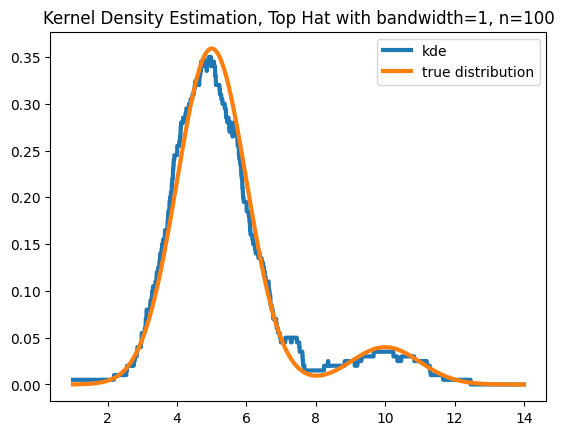

In [5]:
kd = kde(kernel_type="top_hat", bandwidth=1)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Top Hat with bandwidth=1, n=100")

##### epanechnikow

Text(0.5, 1.0, 'Kernel Density Estimation, Epanechnikov with bandwidth=1, n=100')

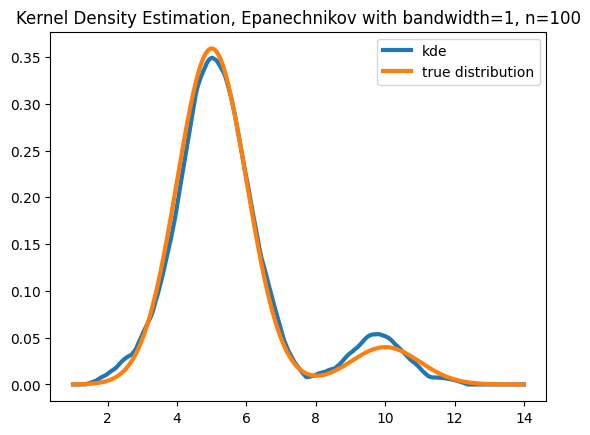

In [ ]:
kd = kde(kernel_type="epanechnikov", bandwidth=1)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Epanechnikov with bandwidth=1, n=100")

##### exponential

Text(0.5, 1.0, 'Kernel Density Estimation, Exponential with bandwidth=0.4, n=100')

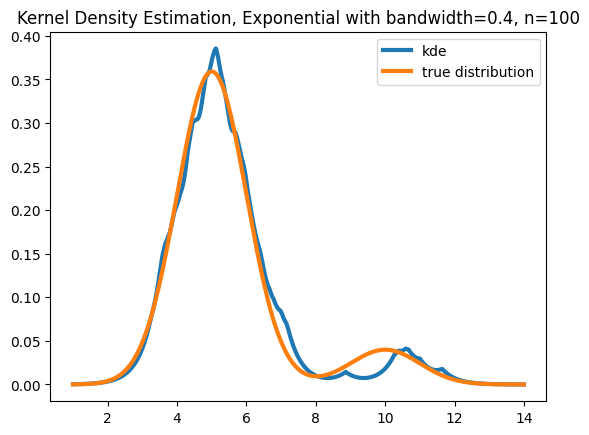

In [ ]:
kd = kde(kernel_type="exponential", bandwidth=0.4)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Exponential with bandwidth=0.4, n=100")

##### gaussian

Text(0.5, 1.0, 'Kernel Density Estimation, Gaussian with bandwidth=0.5, n=100')

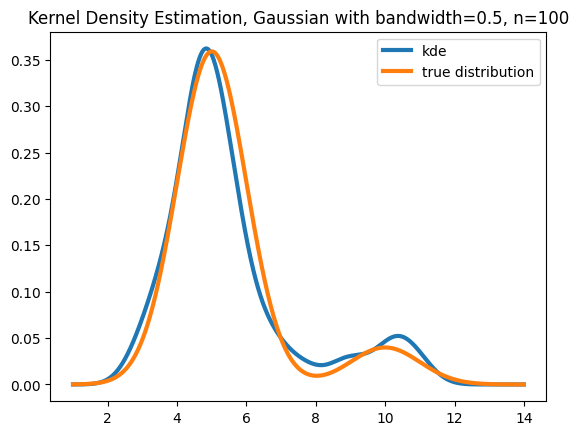

In [ ]:
kd = kde(kernel_type="gaussian", bandwidth=0.5)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation, Gaussian with bandwidth=0.5, n=100")

All kernels works as intended, event thought I didn't show this phenomena I discovered that kernel type don't matter if sample size is big enough. Thats why I showed differences on n = 100. Then we can see various strategies of smoothing.

#### Intuitions (tested only on gaussian kernel)

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=1, n=10000')

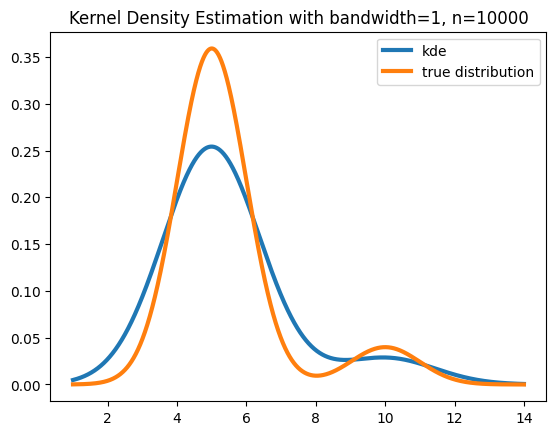

In [ ]:
kd = kde(bandwidth=1)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=1, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=3, n=10000')

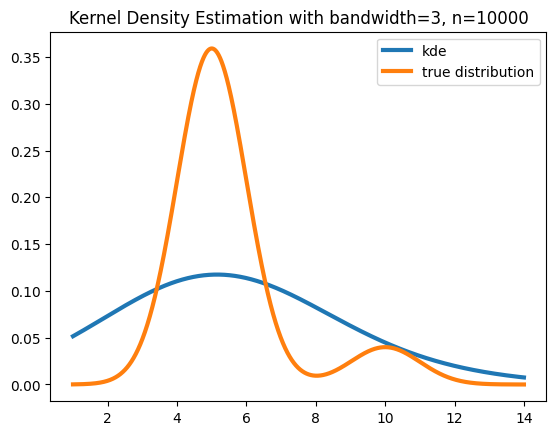

In [ ]:
kd = kde(bandwidth=3)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=3, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.5, n=10000')

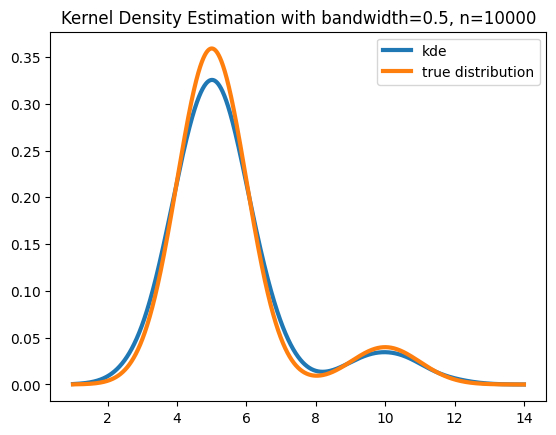

In [ ]:
kd = kde(bandwidth=0.5)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.5, n=10000")

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.2, n=10000')

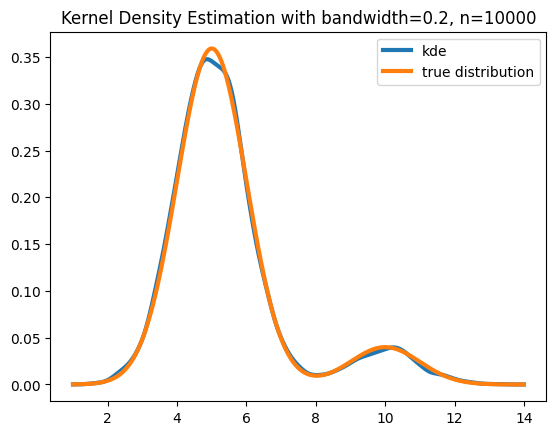

In [ ]:
kd = kde(bandwidth=0.2)

data = generate_data(10000)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.2, n=10000")

This configuration seems optimal. What will happened if I change size of input data

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.2, n=100')

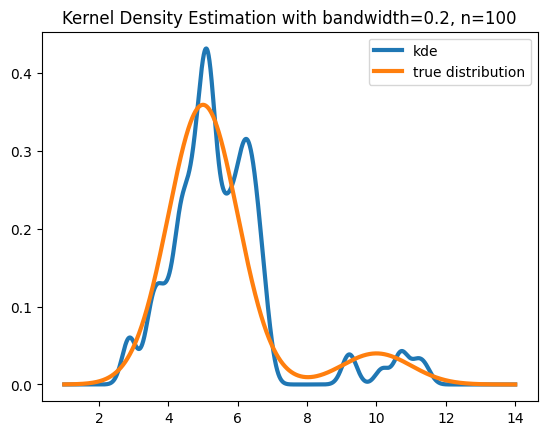

In [ ]:
kd = kde(bandwidth=0.2)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.2, n=100")

We can see that with change of n, optimal bandwidth also changes, they are dependent

The theory says that optimal bandwidth is proportional to n^(-1/5), lets say that 0.2 was optimal for 10000, then c = 0.2/10000^(-1/5), and new optimal bandwidth h_opt = c * 100^(-1/5) = 0.5

Text(0.5, 1.0, 'Kernel Density Estimation with bandwidth=0.5, n=100')

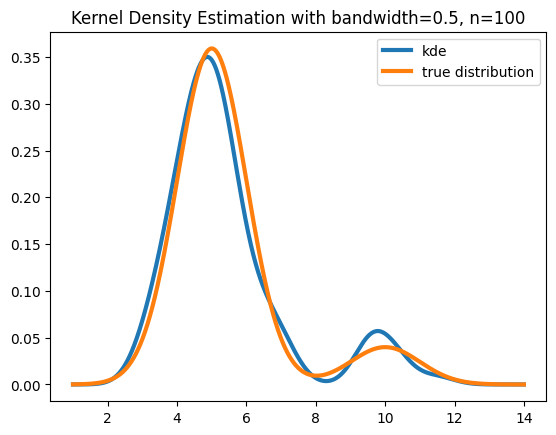

In [56]:
kd = kde(bandwidth=0.5)

data = generate_data(100)
kd.fit(data)
plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=3,
)
plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=3,
)
plt.legend()
plt.title("Kernel Density Estimation with bandwidth=0.5, n=100")

### compute mse

In [26]:
bandwidths = np.linspace(0.1, 1, 50)
sample_sizes = np.linspace(50, 10000, 50, dtype=int)
errors = np.zeros((len(bandwidths), len(sample_sizes)))

for i, bandwidth in enumerate(bandwidths):
    for j, sample_size in enumerate(sample_sizes):
        for _ in range(5):
            kd = kde(bandwidth=bandwidth)
            data = generate_data(sample_size)
            kd.fit(data)
            errors[i, j] += np.mean(
                (
                    kd.transform(np.linspace(1, 14, 5000))
                    - (
                        0.1
                        * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
                        / (1 * np.sqrt(2 * np.pi))
                        + 0.9
                        * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
                        / (1 * np.sqrt(2 * np.pi))
                    )
                )
                ** 2
            )

Text(0.5, 1.0, 'Visualization of error')

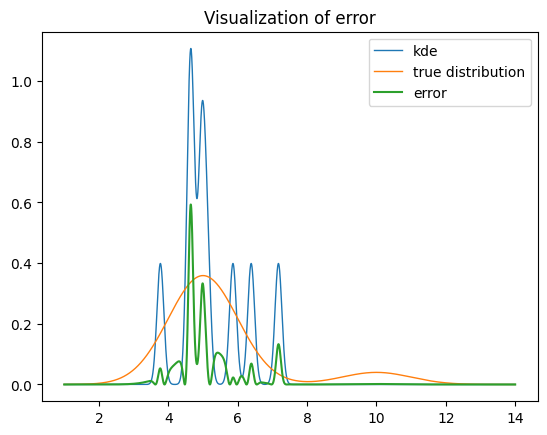

In [23]:
kd = kde(bandwidth=0.1)

data = generate_data(10)
kd.fit(data)

plt.plot(
    np.linspace(1, 14, 5000),
    kd.transform(np.linspace(1, 14, 5000)),
    label="kde",
    linewidth=1,
)

plt.plot(
    np.linspace(1, 14, 5000),
    0.1
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi))
    + 0.9
    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
    / (1 * np.sqrt(2 * np.pi)),
    label="true distribution",
    linewidth=1,
)

plt.plot(
    np.linspace(1, 14, 5000),
    1
    * (
        kd.transform(np.linspace(1, 14, 5000))
        - (
            0.1
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
            + 0.9
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
        )
    )
    ** 2,
    label="error",
)
plt.legend()
plt.title("Visualization of error")

### How MSE depends on bandwidth and sample size

Text(0.5, 1.0, 'log(1/Error) of KDE')

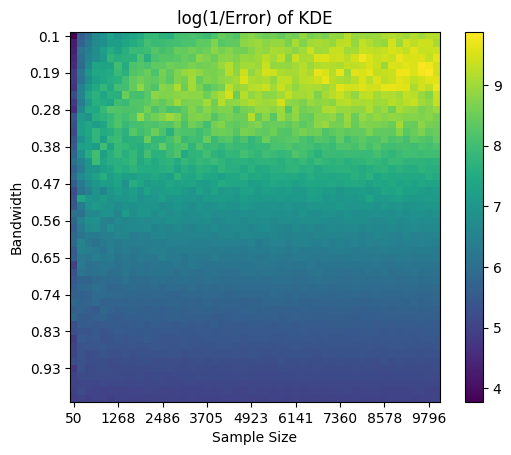

In [27]:
# make a heat map of error with low values being green and high values being red
plt.imshow(np.log(1 / errors))
plt.colorbar()
plt.xlabel("Sample Size")
plt.xticks(np.arange(0, 50, 6), sample_sizes[::6])
plt.ylabel("Bandwidth")
plt.yticks(np.arange(0, 50, 5), np.round(bandwidths[::5], 2))
plt.title("log(1/Error) of KDE")

Such transformation have been done in order to facilitate trend and present in in a pleasing way, the more yellower square is the lower MSE. We can see that with higher sample size the bandwidth shrinks. This is in line with theory. On this plot each square is created based on 5 runs in order to reduce noise. 

### Random Jitter

In [19]:
data = generate_data(20)
kd = kde(bandwidth=0.45)
kd.fit(data)
plain_data_mse = np.mean(
    (
        kd.transform(np.linspace(1, 14, 5000))
        - (
            0.1
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
            + 0.9
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
        )
    )
    ** 2
)


jittered_data_mse = []
for i in range(200, 10000, 100):

    data = np.random.choice(data, i)
    bandwidth = 0.1
    data = data + np.random.normal(0, 1, i) * bandwidth
    kd = kde(bandwidth=bandwidth)
    kd.fit(data)
    jittered_data_mse.append(
        np.mean(
            (
                kd.transform(np.linspace(1, 14, 5000))
                - (
                    0.1
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                    + 0.9
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                )
            )
            ** 2
        )
    )

Text(0.5, 1.0, 'Mean Squared Error of KDE with Jittered Data on just 20 data points')

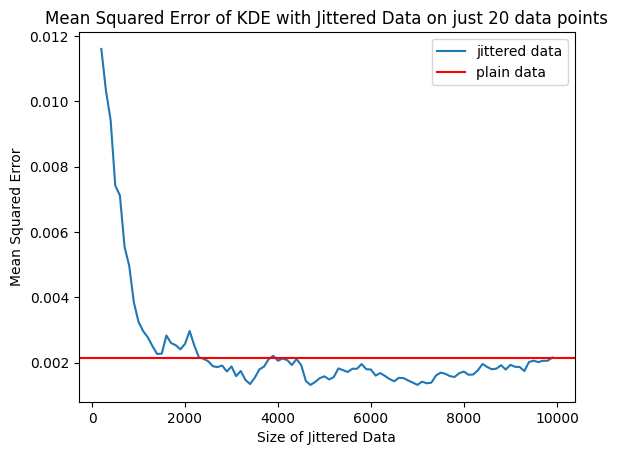

In [23]:
# make a line plot of jittered data mse and baseline data mse
plt.plot(range(200, 10000, 100), jittered_data_mse, label="jittered data")
plt.axhline(plain_data_mse, color="red", label="plain data")
plt.xlabel("Size of Jittered Data")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Mean Squared Error of KDE with Jittered Data on just 20 data points")

In [24]:
data = generate_data(200)
kd = kde(bandwidth=0.5)
kd.fit(data)
plain_data_mse = np.mean(
    (
        kd.transform(np.linspace(1, 14, 5000))
        - (
            0.1
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
            + 0.9
            * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
            / (1 * np.sqrt(2 * np.pi))
        )
    )
    ** 2
)


jittered_data_mse = []
for i in range(200, 10000, 100):

    data = np.random.choice(data, i)
    bandwidth = 0.1
    data = data + np.random.normal(0, 1, i) * bandwidth
    kd = kde(bandwidth=bandwidth)
    kd.fit(data)
    jittered_data_mse.append(
        np.mean(
            (
                kd.transform(np.linspace(1, 14, 5000))
                - (
                    0.1
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 10) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                    + 0.9
                    * np.exp(-0.5 * ((np.linspace(1, 14, 5000) - 5) / 1) ** 2)
                    / (1 * np.sqrt(2 * np.pi))
                )
            )
            ** 2
        )
    )

Text(0.5, 1.0, 'Mean Squared Error of KDE with Jittered Data on 200 data points')

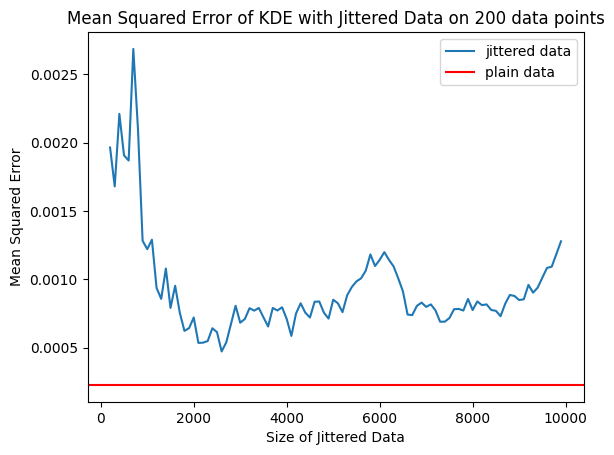

In [25]:
# make a line plot of jittered data mse and baseline data mse
plt.plot(range(200, 10000, 100), jittered_data_mse, label="jittered data")
plt.axhline(plain_data_mse, color="red", label="plain data")
plt.xlabel("Size of Jittered Data")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Mean Squared Error of KDE with Jittered Data on 200 data points")

This technique is effective when our sample size is really small for example 20. Then our results are better than using original sample. But with 200 observations method that uses jittered data yields worst mse.

### Comparison with other methods on real data

In [73]:
class NB_with_KDE:
    """

    Methods:
        fit(X, y): Fit the Naive Bayes classifier to the training data.
        predict_proba(X_test): Predict the class probabilities for the test data.
        predict(X_test): Predict the class labels for the test data.
        return_params(): Return the parameters of the Naive Bayes classifier.
    """

    def __init__(self) -> None:
        self.list_of_kdes_0 = []
        self.list_of_kdes_1 = []

    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier to the training data.

        Args:
            X (DataFrame): Training data features.
            y (array-like): Training data labels.
        """
        self.X = X
        self.y = y
        self.fraction_1 = sum(y) / len(y)
        self.fraction_0 = 1 - self.fraction_1
        for column in X.columns:
            kde_0 = kde(bandwidth=1)
            kde_1 = kde(bandwidth=1)
            kde_0.fit(X[y == 0][column])
            kde_1.fit(X[y == 1][column])
            self.list_of_kdes_0.append(kde_0)
            self.list_of_kdes_1.append(kde_1)

    def predict_proba(self, X_test):
        """
        Predict the class probabilities for the test data.

        Args:
            X_test (DataFrame): Test data features.

        Returns:
            ndarray: Predicted class probabilities.
        """
        probabilities = []
        for _, row in X_test.iterrows():
            for i, kde_0 in enumerate(self.list_of_kdes_0):
                if i == 0:
                    prob_0 = kde_0.transform(row[i])
                else:
                    prob_0 *= kde_0.transform(row[i])
            for i, kde_1 in enumerate(self.list_of_kdes_1):
                if i == 0:
                    prob_1 = kde_1.transform(row[i])
                else:
                    prob_1 *= kde_1.transform(row[i])
            numerator = self.fraction_1 * prob_1
            denominator = self.fraction_1 * prob_1 + self.fraction_0 * prob_0
            if denominator == 0:
                probabilities.append(0)
            else:
                probabilities.append(numerator / denominator)
        return probabilities

    def predict(self, X_test):
        """
        Predict the class labels for the test data.

        Args:
            X_test (DataFrame): Test data features.

        Returns:
            Series: Predicted class labels.
        """
        X_test_copy = X_test.copy()
        X_test_copy["predicted_proba"] = self.predict_proba(X_test)
        X_test_copy["y_pred"] = 0
        X_test_copy.loc[X_test_copy["predicted_proba"] > 0.5, "y_pred"] = 1
        return X_test_copy["y_pred"]

The same data that was used in previous laboratory task

In [33]:
sa_data = pd.read_csv("data/SAheart.data")
sa_data = sa_data.drop("row.names", axis=1)
sa_data["famhist"] = sa_data["famhist"].map({"Present": 1, "Absent": 0})
y_real = sa_data["chd"]
x_real = sa_data.drop("chd", axis=1)

In [69]:
sa_data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [74]:
naive_gauss = []
lda_list = []
naive_cat = []
nb_kde_list = []

for i in range(40):
    x_train, x_test, y_train, y_test = train_test_split(x_real, y_real, test_size=0.2)

    # import from sklearn gaussian naive bayes, lda, categorical naive bayes
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import CategoricalNB

    gnb = GaussianNB()
    gnb.fit(x_train, y_train)

    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train, y_train)

    cnb = CategoricalNB()
    bin = KBinsDiscretizer(n_bins=7, encode="ordinal", strategy="uniform")
    x_real_binned = bin.fit_transform(x_train)
    cnb.fit(x_real_binned, y_train)

    nb_kde = NB_with_KDE()
    nb_kde.fit(x_train, y_train)

    naive_gauss.append(gnb.score(x_test, y_test))
    lda_list.append(lda.score(x_test, y_test))
    naive_cat.append(cnb.score(bin.transform(x_test), y_test))
    nb_kde_list.append(nb_kde.predict(x_test).eq(y_test).mean())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


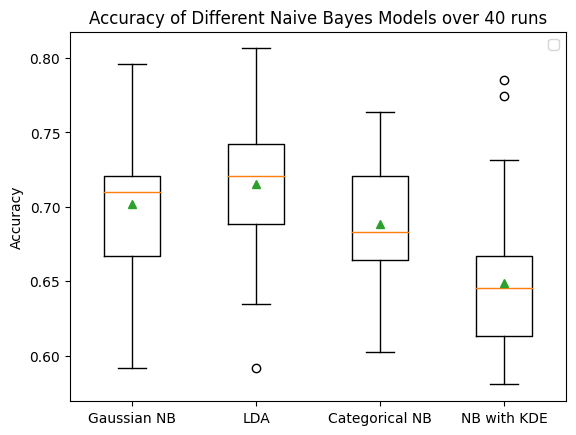

In [75]:
# create a box plot of the accuracy of the four models
plt.boxplot([naive_gauss, lda_list, naive_cat, nb_kde_list], showmeans=True)
plt.xticks([1, 2, 3, 4], ["Gaussian NB", "LDA", "Categorical NB", "NB with KDE"])
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Naive Bayes Models over 40 runs")
plt.legend()